# This notebook is developed to understand the working of decision trees. The decision tree is a classic machine learning algorithm that can be used for classification purposes. Here the same is applied on the red wine quality dataset to classify the wine quality as good or bad 

### Importing red wine quality dataset and creating two classes. Class 1 is wine quality score > 6 and the other wine quality score <6.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header=None)
df.tail()
y = df.iloc[1:150, 11].values
y = np.where(y > '6', -1, 1)
X = df.iloc[1:150, [0,10]].values

### sklearn library is imported for splitting the dataset into training and testing. The train-test split function here puts 70 % of data in training and remaining 30% in testing.

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Standard scaler is imported for tranforming the parameters in such a manner that no attribute has a dominating factor associated with it. It is done for unbiased tree formation without any issues related with the attributes.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

### Main part of the notebook where the decision tree classifier is imported from the sklearn library. The tree gets on the traning data and then fits the test data as given below. The accuracy of classification has also been mentioned below.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
tree = DecisionTreeClassifier(max_depth=4,random_state = 0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.867


### Graphviz is imported to observe and save the decision tree in our system. The prime attributes used for wine quality classification are Fixed Acidity and Alcohol content

In [6]:
from sklearn.tree import export_graphviz

In [7]:
export_graphviz(tree,out_file='tree.dot',class_names=['Bad Wine Quality(<6)','Good Quality(>6)'],feature_names=['Fixed Acidity', 'Alcohol'],impurity=False,filled=True)

In [8]:
import graphviz

### Observing the formed decision tree

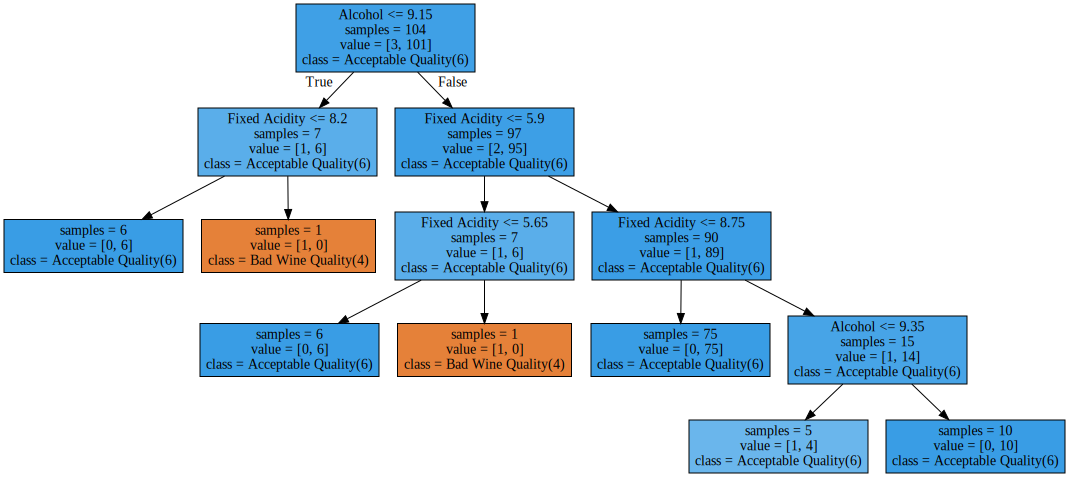

In [9]:
with open("/home/shriansh/Downloads/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### The following code snippet is very important for many machine learning applications. Here the attribute set is evaluated. The feature or attribute importance of the given dataset is done below. In this manner one can easily find out the important attributes of the concerned dataset and those can be used for better prediction or classification.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header=None)
feat_labels = df.columns[0:]
feat_names = ['Fixed Acidity','Volatile Acid','Citric Acid','Residual Sugar','Chlorides','Free Sulfur Oxides','Total Sulfur Oxide','Density','pH','Sulphates','Alcohol','Quality']
y = df.iloc[1:150, 11].values
y = np.where(y == '6', -1, 1)
X = df.iloc[1:150, :].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_names[f],importances[indices[f]]))

 1) Fixed Acidity                  0.594159
 2) Volatile Acid                  0.053431
 3) Citric Acid                    0.052376
 4) Residual Sugar                 0.050900
 5) Chlorides                      0.046357
 6) Free Sulfur Oxides             0.035957
 7) Total Sulfur Oxide             0.033829
 8) Density                        0.028104
 9) pH                             0.027470
10) Sulphates                      0.027359
11) Alcohol                        0.026148
12) Quality                        0.023911


### Feature Importance graph 

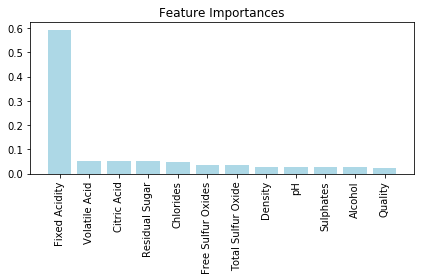

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
importances[indices],
color='lightblue',
align='center')
plt.xticks(range(X_train.shape[1]),
feat_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()